In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.float_format', lambda x: '%.2f' % x)

data = pd.read_csv("data/Melbourne.csv")
data = data.drop(columns= ["Address", "Postcode", "CouncilArea", "Lattitude", "Longtitude","YearBuilt", "Bedroom2"])
data.columns
data = data[data.Price.notna()]
data.describe()

ModuleNotFoundError: No module named 'keras'

In [3]:
print("-"*35)
print("Missing values in columns")
print("-"*35)
print(data.isna().sum())
print("-"*35)
print("Sum of missing values:",data.isna().sum().sum())

-----------------------------------
Missing values in columns
-----------------------------------
Suburb               0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Bathroom          6447
Car               6824
Landsize          9265
BuildingArea     16591
Regionname           3
Propertycount        3
dtype: int64
-----------------------------------
Sum of missing values: 39134


<AxesSubplot:>

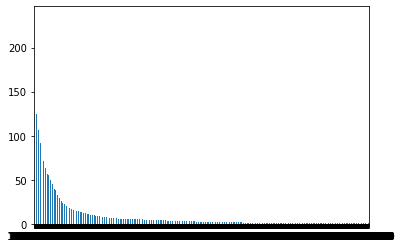

In [4]:
data.Price.value_counts().plot.bar(rot=0)

In [5]:

data.Date = pd.to_datetime(data.Date, format="%d/%m/%Y")
data["Quarter"] = pd.PeriodIndex(data.Date, freq= "Q")
mask = data.SellerG.map(data.SellerG.value_counts()) < 500
data.SellerG = data.SellerG.mask(mask, "Minor seller")
#filling missing values
data.Distance.fillna(data.Distance.mean(), inplace=True)
data.Bathroom.fillna(1, inplace=True)
data.Car.fillna(data.Car.mean(), inplace=True)
data.Propertycount.fillna(data.Propertycount.mean(), inplace=True)
data = data[data.Regionname.notna()]

<AxesSubplot:xlabel='Propertycount'>

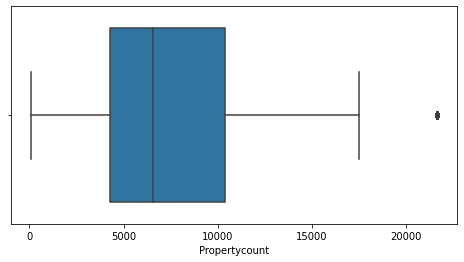

In [6]:
#boxplots
plt.figure(figsize = (8,4))
sns.boxplot(x = data.Propertycount)

In [7]:
#variable transformation
data.loc[data.Rooms > 7, "Rooms"] = 7
data.loc[data.Distance > 25.4, "Distance"] = 25.4
data.loc[data.Bathroom > 3, "Bathroom"] = 3
data.loc[data.Car > 3, "Car"] = 3
data.loc[data.Propertycount > 19452, "Propertycount"] = 19452
data.loc[data.Price < 800000, "Price"] = 0
data.loc[data.Price >= 800000, "Price"] = 1

In [8]:
data.Price.value_counts()

1.00    15625
0.00    11619
Name: Price, dtype: int64

In [9]:
_data = data.copy()
_data = _data.drop(columns=["Date", "BuildingArea", "Landsize"])

#create dummies
for item in ["Suburb", "Type", "SellerG", "Regionname", "Quarter","Method"]:
    ip = _data[item].unique()
    ip = sorted(ip)
    ip_dict = dict(zip(ip, range(1,len(ip)+1)))
    _data[item] = _data[item].map(ip_dict)

print("-"*35)
print("Missing values in columns")
print("-"*35)
print(_data.isna().sum())
print("-"*35)
print("Sum of missing values:",_data.isna().sum().sum())

-----------------------------------
Brakujące wartości w kolumnach
-----------------------------------
Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bathroom         0
Car              0
Regionname       0
Propertycount    0
Quarter          0
dtype: int64
-----------------------------------
Suma brakujących wartości: 0


In [10]:
X = _data.iloc[:, _data.columns != "Price"]
Y = _data.Price

In [11]:
X_obj = X
X_no = _data.drop(['Suburb', 'Type', 'Price', 'Method', 'SellerG', 'Regionname', 'Quarter'], axis=1)

In [12]:
from sklearn import preprocessing
X_train_no, X_test_no, Y_train_no, Y_test_no = train_test_split(X_no, Y, test_size=0.3, random_state=5, stratify=Y)
scaler = preprocessing.StandardScaler().fit(X_train_no)
X_train_scaled_no = scaler.transform(X_train_no)
model_no = LogisticRegression(C=1e30)
model_no.fit(X_train_scaled_no, Y_train_no)
train_acc = model_no.score(X_train_scaled_no, Y_train_no)
print("The Accuracy for Training Set is {}".format(train_acc*100))
from sklearn.metrics import accuracy_score
X_test_scaled_no = scaler.transform(X_test_no)
y_pred_no = model_no.predict(X_test_scaled_no)
test_acc = accuracy_score(Y_test_no, y_pred_no)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Training Set is 74.0325117986366
The Accuracy for Test Set is 74.56569610961586


In [13]:
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5, stratify=Y)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = LogisticRegression(C=1e30)
model.fit(X_train_scaled, Y_train)
train_acc = model.score(X_train_scaled, Y_train)
y_pred = model.predict(X_train_scaled)
print("The Accuracy for Training Set is {}".format(train_acc*100))
print(classification_report(Y_train, y_pred))
# print(confusion_matrix(Y_train, y_pred))
from sklearn.metrics import accuracy_score
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
test_acc = accuracy_score(Y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
# print(classification_report(Y_test, y_pred))
# print(confusion_matrix(Y_test, y_pred))

The Accuracy for Training Set is 78.18038804404824
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      8133
         1.0       0.79      0.84      0.82     10937

    accuracy                           0.78     19070
   macro avg       0.78      0.77      0.77     19070
weighted avg       0.78      0.78      0.78     19070

The Accuracy for Test Set is 78.3337411304135


<AxesSubplot:>

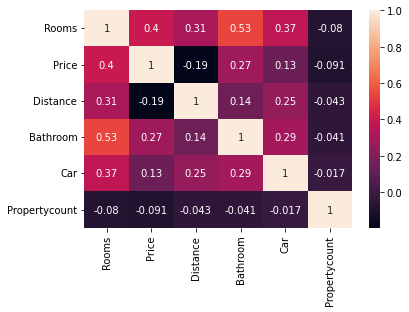

In [14]:
X_no111 = _data.drop(['Suburb', 'Type', 'Method', 'SellerG', 'Regionname', 'Quarter'], axis=1)
%matplotlib inline
sns.heatmap(X_no111.corr(), annot=X_no111.corr())

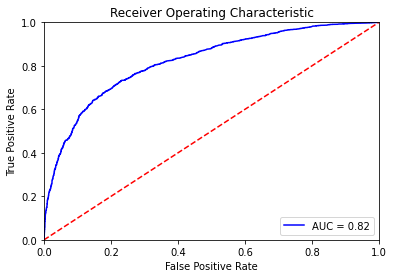

In [15]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model_no.predict_proba(X_test_scaled_no)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test_no, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree_new = DecisionTreeClassifier()
tree_new.fit(X_train_scaled, Y_train)
train_acc = tree_new.score(X_train_scaled, Y_train)
y_pred = tree_new.predict(X_train_scaled)
print("The Accuracy for Training Set is {}".format(train_acc*100))
print(classification_report(Y_train, y_pred))

from sklearn.metrics import accuracy_score
X_test_scaled = scaler.transform(X_test)
y_pred = tree_new.predict(X_test_scaled)
test_acc = accuracy_score(Y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(confusion_matrix(Y_test, y_pred))

The Accuracy for Training Set is 98.77294179339276
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      8133
         1.0       1.00      0.98      0.99     10937

    accuracy                           0.99     19070
   macro avg       0.99      0.99      0.99     19070
weighted avg       0.99      0.99      0.99     19070

The Accuracy for Test Set is 84.30389038414485
[[2849  637]
 [ 646 4042]]


In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_new_no = DecisionTreeClassifier()
tree_new_no.fit(X_train_scaled_no, Y_train_no)
train_acc = tree_new_no.score(X_train_scaled_no, Y_train_no)
y_pred = tree_new_no.predict(X_train_scaled_no)
print("The Accuracy for Training Set is {}".format(train_acc*100))
print(classification_report(Y_train_no, y_pred))
print(confusion_matrix(Y_train_no, y_pred))

from sklearn.metrics import accuracy_score
scaler = preprocessing.StandardScaler().fit(X_train_no)
X_test_scaled_no = scaler.transform(X_test_no)
y_pred_no = tree_new_no.predict(X_test_scaled_no)
test_acc = accuracy_score(Y_test_no, y_pred_no)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(Y_test_no, y_pred_no))
print(confusion_matrix(Y_test_no, y_pred_no))

The Accuracy for Training Set is 89.83744100681699
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.88      8133
         1.0       0.93      0.89      0.91     10937

    accuracy                           0.90     19070
   macro avg       0.89      0.90      0.90     19070
weighted avg       0.90      0.90      0.90     19070

[[7450  683]
 [1255 9682]]
The Accuracy for Test Set is 83.28847565451431
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81      3486
         1.0       0.87      0.83      0.85      4688

    accuracy                           0.83      8174
   macro avg       0.83      0.83      0.83      8174
weighted avg       0.84      0.83      0.83      8174

[[2918  568]
 [ 798 3890]]


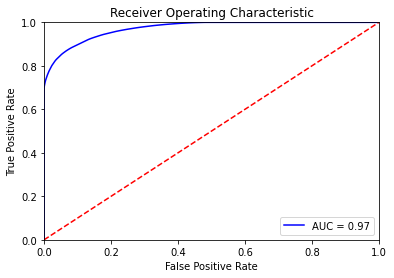

In [18]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = tree_new_no.predict_proba(X_train_scaled_no)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train_no, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train_scaled, Y_train)
train_acc = clf.score(X_train_scaled, Y_train)
y_pred = clf.predict(X_train_scaled)
print("The Accuracy for Training Set is {}".format(train_acc*100))
print(confusion_matrix(Y_train, y_pred))


from sklearn.metrics import accuracy_score
scaler = preprocessing.StandardScaler().fit(X_train)
X_test_scaled = scaler.transform(X_test)
y_pred = clf.predict(X_test_scaled)
test_acc = accuracy_score(Y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

The Accuracy for Training Set is 98.77294179339276
[[ 8030   103]
 [  131 10806]]
The Accuracy for Test Set is 88.40225103988256
[[2965  521]
 [ 427 4261]]
              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      3486
         1.0       0.89      0.91      0.90      4688

    accuracy                           0.88      8174
   macro avg       0.88      0.88      0.88      8174
weighted avg       0.88      0.88      0.88      8174



In [20]:
from sklearn.ensemble import RandomForestClassifier
clf_no = RandomForestClassifier(n_estimators = 100) 
clf_no.fit(X_train_scaled_no, Y_train_no)
train_acc = clf_no.score(X_train_scaled_no, Y_train_no)
y_pred = clf_no.predict(X_train_scaled_no)
print("The Accuracy for Training Set is {}".format(train_acc*100))
print(classification_report(Y_train_no, y_pred))
print(confusion_matrix(Y_train_no, y_pred))

from sklearn.metrics import accuracy_score
scaler = preprocessing.StandardScaler().fit(X_train_no)
X_test_scaled_no = scaler.transform(X_test_no)
y_pred_no = clf_no.predict(X_test_scaled_no)
test_acc = accuracy_score(Y_test_no, y_pred_no)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(Y_test_no, y_pred_no))
print(confusion_matrix(Y_test_no, y_pred_no))

The Accuracy for Training Set is 89.83744100681699
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      8133
         1.0       0.92      0.91      0.91     10937

    accuracy                           0.90     19070
   macro avg       0.90      0.90      0.90     19070
weighted avg       0.90      0.90      0.90     19070

[[7229  904]
 [1034 9903]]
The Accuracy for Test Set is 83.50868607780768
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      3486
         1.0       0.86      0.85      0.86      4688

    accuracy                           0.84      8174
   macro avg       0.83      0.83      0.83      8174
weighted avg       0.84      0.84      0.84      8174

[[2825  661]
 [ 687 4001]]


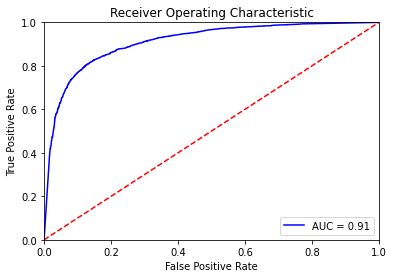

In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_no.predict_proba(X_test_scaled_no)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test_no, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
def predict_with_LSTM(frame, y_cols, x_cols, epochs, ratio, title):
    y = frame.filter(y_cols)
    x = frame.filter(x_cols)
    dataset = y.values
    input_dataset = x.values
    factors = x.shape[1]
    
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil( len(dataset) * ratio ))
    
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_input_dataset = scaler.fit_transform(input_dataset)
    scaled_data = scaler.fit_transform(dataset)
    
    # Create the training data set 
    # Create the scaled training data set
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = ratio)
    # Split the data into x_train and y_train data sets

    # Convert the x_train and y_train to numpy arrays 
    x_train, y_train = np.array(X_train), np.array(Y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*factors, 1))
    
    
        ##########
    # Create the testing data set
    
    # Create the data sets x_test and y_test
    # Convert the data to a numpy array
    x_test = np.array(X_test)


    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*factors, 1 ))

    #get y_test
    y_test = Y_test
    
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

    #early stop
    early_stop = EarlyStopping(monitor='val_mean_squared_error', patience=75, mode = 'min', restore_best_weights=True)
    
    #batch_size
    BATCH_SIZE = 4
    
    history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=epochs,
                        validation_split=0.1, validation_batch_size=BATCH_SIZE, shuffle = False, callbacks=[early_stop])
              
              
              
              
    #, validation_data=(x_test, y_test))
    # visualizing losses and accuracy
    
    print(history.history.keys())
    train_loss = history.history['loss']
    val_loss   = history.history['val_loss']
    train_acc = history.history['mean_squared_error']
    val_acc = history.history['val_mean_squared_error']
    xc         = range(epochs)
    plt.figure(figsize=(16,6))
#     plt.plot(xc, train_loss)
#     plt.show()
#     plt.figure(figsize=(16,6))
#     plt.plot(xc, val_loss)
#     plt.show()
    #plt.show()
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
    

    # Get the models predicted price values 
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    print("predictions shape:", predictions.shape)
    # Get the root mean squared error (RMSE)
    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    mape = mean_absolute_percentage_error(y_test, predictions)

    
    # Plot the data
    train = frame[:training_data_len]
    print("train shape:", train.shape)
    valid = frame[training_data_len:]
    print("valid shape:", valid.shape)
    valid['Predictions'] = predictions
    valid
    #Visualize the data
    plt.figure(figsize=(16,6))
    plt.title(title)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price ' + y_cols[0], fontsize=18)
    #plt.plot(train['CHF'])
    plt.plot(valid[[y_cols[0], 'Predictions']])
    plt.legend(['Val', 'Predictions'], loc='lower right') #'Train'
    plt.show()
    print("RMSE: ", rmse)
    print("MAPE: ", mape)
    return rmse, mape


ModuleNotFoundError: No module named 'keras'

In [136]:
X

,Suburb,Rooms,Type,Method,SellerG,Distance,Bathroom,Car,Regionname,Propertycount,Quarter
1,1,2,1,2,2,2.50,1.00,1.00,3,4019.00,4
2,1,2,1,2,2,2.50,1.00,0.00,3,4019.00,1
4,1,3,1,4,2,2.50,2.00,0.00,3,4019.00,5
5,1,3,1,1,2,2.50,2.00,1.00,3,4019.00,5
6,1,4,1,5,9,2.50,1.00,2.00,3,4019.00,2
...,...,...,...,...,...,...,...,...,...,...,...
34852,342,4,1,1,8,6.30,1.00,3.00,7,6543.00,9
34853,342,2,1,4,8,6.30,2.00,1.00,7,6543.00,9
34854,342,2,2,2,8,6.30,1.00,2.00,7,6543.00,9
34855,342,3,1,4,12,6.30,1.00,1.72,7,6543.00,9
